Preprocessing


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('train.csv')

# Feature engineering: Title and family size
def extract_title(name): return name.split(',')[1].split('.')[0].strip()
df['Title'] = df.Name.map(extract_title)
df['FamilySize'] = df.SibSp + df.Parch + 1

# Columns
drop_cols = ['PassengerId','Name','Ticket','Cabin']
target = 'Survived'

# Numerical & categorical lists
num_cols = ['Age','Fare','FamilySize']
cat_cols = ['Pclass','Sex','Embarked','Title']

# Pipelines
num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)])

1.3 Model Training & Comparison

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import roc_auc_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

X = df.drop(columns=drop_cols + [target])
y = df[target]
X_pre = preprocessor.fit_transform(X)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_pre, y, cv=5, scoring='roc_auc')
    results[name] = scores
    print(f"{name}: AUC = {scores.mean():.3f} ± {scores.std():.3f}")

LogisticRegression: AUC = 0.867 ± 0.024
RandomForest: AUC = 0.857 ± 0.035
SVM: AUC = 0.853 ± 0.022


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: AUC = 0.863 ± 0.033


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


1.4 Evaluation & Plots

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


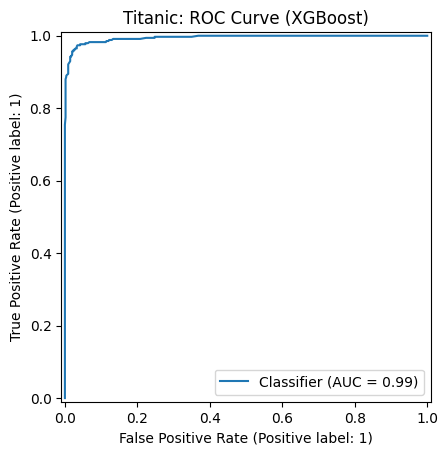

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Example ROC curve for best model
y_train_pred = models['XGBoost'].fit(X_pre, y).predict_proba(X_pre)[:,1]
RocCurveDisplay.from_predictions(y, y_train_pred)
plt.title('Titanic: ROC Curve (XGBoost)')
plt.show()